<div>
<img src="OneDrive\Bureau\images.png" alt="Tunisair Logo"  style="float:right; width : 130px;"/>
<img src="OneDrive\Bureau\utm.png" alt="UTM Logo" style="float:left; width : 130px"/>
</div>

<h1 style="text-align :center ; color : red;"><span><b>Comparaison des Tarifs Aériens de Tunisair et des Compagnies Françaises
</b>    </span> </h1>

# Introduction
Ce projet vise à comparer les tarifs des vols de la compagnie aérienne nationale tunisienne, Tunisair, avec ceux de diverses compagnies aériennes françaises. À l'aide d'une base de données relationnelle MySQL et d'analyses réalisées avec des bibliothèques Python, nous allons explorer les différences de prix et identifier les tendances. En complément, un tableau de bord interactif sera développé avec Power BI, et des techniques de Machine Learning seront appliquées pour prévoir les tendances tarifaires futures.


## Objectifs du Projet
- Collecter et organiser les données tarifaires de Tunisair et des compagnies aériennes françaises.
- Analyser les données pour identifier les tendances et les différences de tarifs.
- Utiliser des bibliothèques Python pour effectuer des analyses statistiques et des visualisations.
- Développer un tableau de bord interactif avec Power BI pour présenter les résultats.
- Intégrer une composante de Machine Learning pour prédire les tendances tarifaires futures.



## Plan du Projet
1. Explorer et Préparer les Données
2. Analyse des données avec Python
3. Création du tableau de bord Power BI
4. Intégration du Machine Learning
5. Documentation et présentation





# 1.Explorer et Préparer les Données

In [1]:
import pandas as pd
file_path = "OneDrive\Bureau\Tunis vers pays europe.xlsx"
data = pd.read_excel(file_path)
data.head()

,Airline_company,Depart_Airport,Destination,Departure_Date,Departure_Fare,Return_Depart_Airport,Return_Destination,Return_Date,Return_Fare,Passenger_Count
0,Tunisair,Tunis Carthage(TUN),Barcelona,Sunday 30/06/2024,445.500 TND,Barcelona,Tunis Carthage(TUN),Sunday 07 Jul 2024,628.000 TND,1 Adult
1,Tunisair,Tunis Carthage(TUN),Paris,Monday 01/07/2024,"114,000 TND",Paris,Tunis Carthage(TUN),Sunday 07 Jul 2024,"776,000 TND",1 Adult
2,Tunisair,Tunis Carthage(TUN),Bologna,Monday 01 Jul 2024,"679,500 TND",Bologna,Tunis Carthage(TUN),Sunday 07 Jul 2024,"586,000 TND",1 Adult
3,Tunisair,Tunis Carthage(TUN),Bordeaux,Tuesday 02 Jul 2024,"283,000 TND",Bordeaux,Tunis Carthage(TUN),Tuesday 09 jul 2024,"620,500 TND",1 Adult
4,Tunisair,Tunis Carthage(TUN),Bruxelles,Monday 01 Jul 2024,"254,500 TND",Bruxelles,Tunis Carthage(TUN),Monday 08 Jul 2024,"1,332,000 TND",1 Adult


# . Nettoyage des Données

In [2]:
# Supprimer les espaces supplémentaires dans les noms de colonnes
data.columns = data.columns.str.strip()

# Vérifier et renommer les colonnes en double si nécessaire
cols = pd.Series(data.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

data.columns = cols

# Convertir les colonnes tarifaires en chaînes de caractères et nettoyer
data['Departure_Fare'] = data['Departure_Fare'].astype(str)
data['Return_Fare'] = data['Return_Fare'].astype(str)

data['Departure_Fare'] = data['Departure_Fare'].str.replace(',', '').str.replace(' TND', '').str.strip()
data['Departure_Fare'] = pd.to_numeric(data['Departure_Fare'], errors='coerce').fillna(0)

data['Return_Fare'] = data['Return_Fare'].str.replace(',', '').str.replace(' TND', '').str.strip()
data['Return_Fare'] = pd.to_numeric(data['Return_Fare'], errors='coerce').fillna(0)

# Convertir les colonnes de dates en types datetime
data['Departure_Date'] = pd.to_datetime(data['Departure_Date'], format='%A %d %b %Y', errors='coerce')
data['Return_Date'] = pd.to_datetime(data['Return_Date'], format='%A %d %b %Y', errors='coerce')

data.head()


,Airline_company,Depart_Airport,Destination,Departure_Date,Departure_Fare,Return_Depart_Airport,Return_Destination,Return_Date,Return_Fare,Passenger_Count
0,Tunisair,Tunis Carthage(TUN),Barcelona,NaT,445.5,Barcelona,Tunis Carthage(TUN),2024-07-07,628.0,1 Adult
1,Tunisair,Tunis Carthage(TUN),Paris,NaT,114000.0,Paris,Tunis Carthage(TUN),2024-07-07,776000.0,1 Adult
2,Tunisair,Tunis Carthage(TUN),Bologna,2024-07-01,679500.0,Bologna,Tunis Carthage(TUN),2024-07-07,586000.0,1 Adult
3,Tunisair,Tunis Carthage(TUN),Bordeaux,2024-07-02,283000.0,Bordeaux,Tunis Carthage(TUN),2024-07-09,620500.0,1 Adult
4,Tunisair,Tunis Carthage(TUN),Bruxelles,2024-07-01,254500.0,Bruxelles,Tunis Carthage(TUN),2024-07-08,1332000.0,1 Adult


# 2.Analyse des données avec Python

 ### 1.Analyse descriptive

In [3]:
# Fixer le format d'affichage pour les nombres
pd.options.display.float_format = '{:,.2f}'.format

# Statistiques descriptives pour les tarifs de départ
stats_departure = data['Departure_Fare'].describe()
print("Statistiques descriptives pour les tarifs de départ :")
print(stats_departure)

# Statistiques descriptives pour les tarifs de retour
stats_return = data['Return_Fare'].describe()
print("\nStatistiques descriptives pour les tarifs de retour :")
print(stats_return)


Statistiques descriptives pour les tarifs de départ :
count              80.00
mean       14,900,865.54
std       129,754,422.09
min               120.84
25%           180,250.00
50%           308,505.00
75%           663,500.00
max     1,160,950,000.00
Name: Departure_Fare, dtype: float64

Statistiques descriptives pour les tarifs de retour :
count          80.00
mean      729,448.39
std       453,408.69
min             0.00
25%       458,500.00
50%       627,000.00
75%     1,053,500.00
max     1,778,500.00
Name: Return_Fare, dtype: float64


In [4]:
# Afficher les valeurs des tarifs de départ pour identifier les valeurs aberrantes
print(data['Departure_Fare'].sort_values(ascending=False).head(10))


45   1,160,950,000.00
72       1,212,000.00
65       1,185,000.00
64       1,133,000.00
35         921,000.00
62         868,500.00
38         781,000.00
44         749,670.00
63         731,000.00
66         727,000.00
Name: Departure_Fare, dtype: float64


In [5]:
# Définir un seuil pour considérer une valeur comme une valeur aberrante (par exemple, au-dessus du 99e percentile)
upper_limit = data['Departure_Fare'].quantile(0.99)

# Filtrer les données pour exclure les valeurs aberrantes
cleaned_data = data[data['Departure_Fare'] <= upper_limit]

# Vérifier le nombre de valeurs supprimées
print(f"Nombre de valeurs supprimées : {len(data) - len(cleaned_data)}")


Nombre de valeurs supprimées : 1


C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


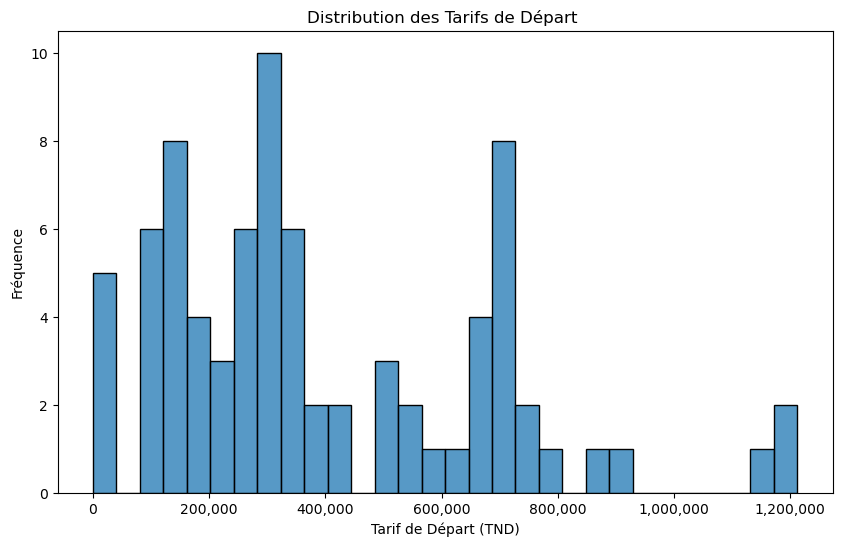

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Histogramme des tarifs de départ sans valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data["Departure_Fare"], bins=30)
plt.title('Distribution des Tarifs de Départ ')
plt.xlabel("Tarif de Départ (TND)")
plt.ylabel("Fréquence")

# Formater les valeurs des axes avec des séparateurs de milliers
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

 #### Interpretation : 
 
<p>Distribution des tarifs de départ des compagnies aériennes" montre un graphique à barres représentant la répartition des prix des billets d'avion au départ , en dinars tunisiens (TND). Les prix des billets d'avion varient en fonction de plusieurs facteurs, tels que la compagnie aérienne et  la date du voyage.

Axes du graphique:

Axe des x: Représente le prix du billet d'avion en dinars tunisiens (TND).
Axe des y: Représente la fréquence, c'est-à-dire le nombre de billets d'avion pour lesquels un prix donné a été proposé.
Observations:
Distribution asymétrique à droite:</span> La plupart des billets d'avion sont proposés à des prix bas, tandis qu'un moins grand nombre est proposé à des prix plus élevés.

Pics de fréquence: Les prix des billets d'avion ne sont pas répartis uniformément, mais plutôt regroupés par tranches de prix plus fréquentes.
</p>  

C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


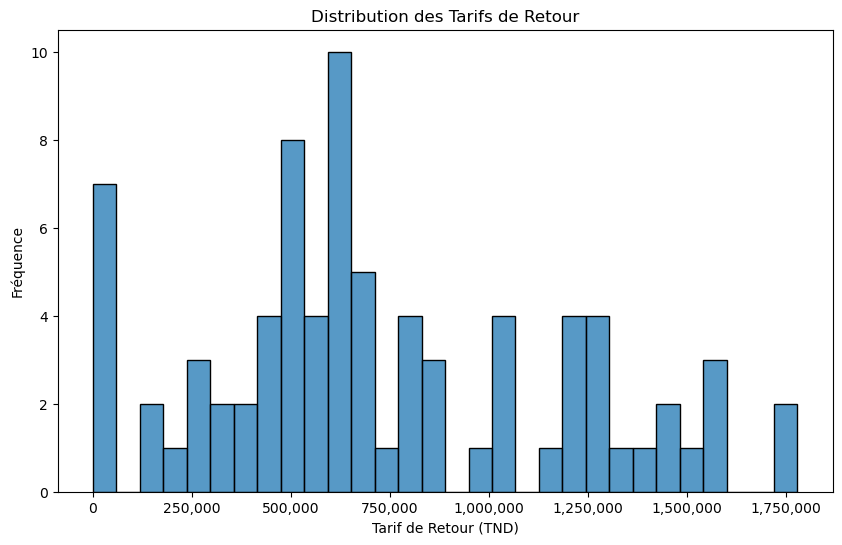

In [7]:
# Histogramme des tarifs de retour
plt.figure(figsize=(10, 6))
sns.histplot(data["Return_Fare"], bins=30)
plt.title('Distribution des Tarifs de Retour')
plt.xlabel("Tarif de Retour (TND)")
plt.ylabel("Fréquence")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

#### Intérprétation
<p>
"Distribution des tarifs des vols retour" montre un graphique à barres représentant la répartition des prix des billets d'avion pour les vols retour, en dinars tunisiens (TND). Les prix des billets d'avion varient en fonction de plusieurs facteurs, tels que la compagnie aérienne et la date du voyage.

Axes du graphique:

Axe des x: Représente le prix du billet d'avion pour le vol retour en dinars tunisiens (TND).
Axe des y: Représente la fréquence, c'est-à-dire le nombre de billets d'avion pour lesquels un prix donné a été proposé pour le vol retour.
Observations:

Distribution asymétrique à droite: La plupart des billets d'avion pour les vols retour sont proposés à des prix bas, tandis qu'un moins grand nombre est proposé à des prix plus élevés.
Pics de fréquence: Les prix des billets d'avion pour les vols retour ne sont pas répartis uniformément, mais plutôt regroupés par tranches de prix plus fréquentes.
</p>    

### 2.Répartition des tarifs par compagnie aérienne

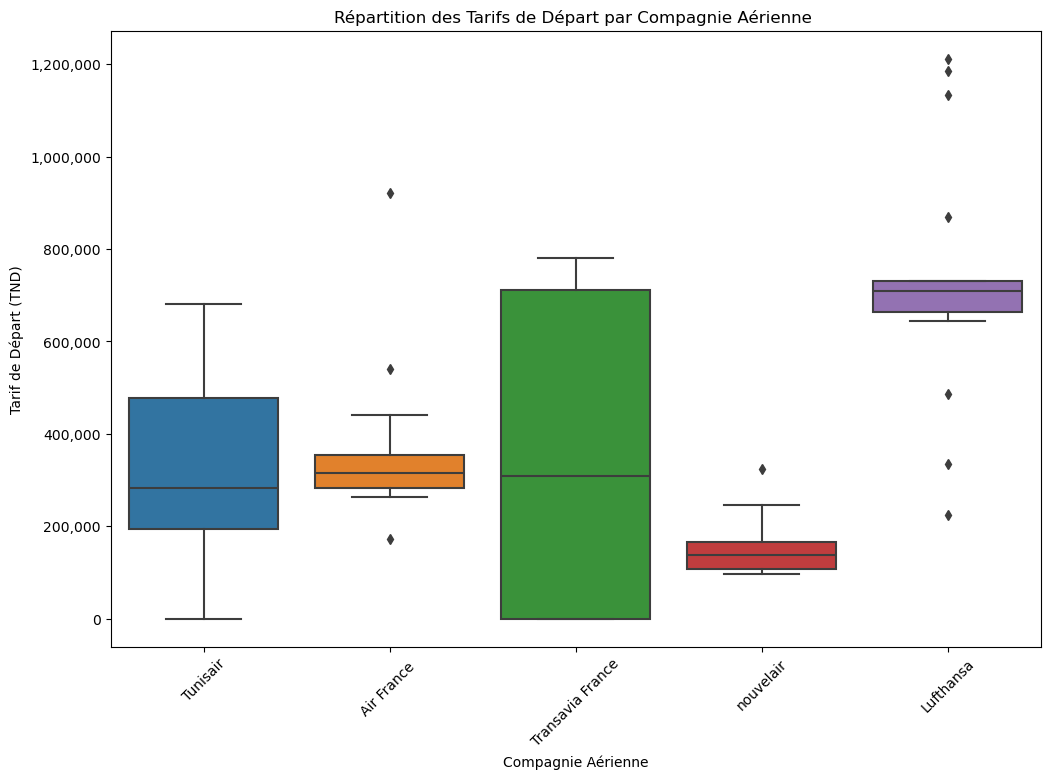

In [8]:

# Boxplot des tarifs de départ par compagnie aérienne sans valeurs aberrantes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline_company', y='Departure_Fare', data=cleaned_data)
plt.title('Répartition des Tarifs de Départ par Compagnie Aérienne ')
plt.xlabel('Compagnie Aérienne')
plt.ylabel('Tarif de Départ (TND)')
plt.xticks(rotation=45)

# Formater les valeurs des axes avec des séparateurs de milliers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

#### Interprétation 
<p>diagramme à boîte (box plot) qui illustre la répartition des tarifs de départ (en TND) pour différentes compagnies aériennes : Tunisair, Air France, Transavia France, Nouvelair, et Lufthansa.

Analyse
Tunisair :
La médiane est autour de 400 000 TND.
L'intervalle interquartile (IQR) s'étend de 200 000 TND à environ 600 000 TND.
Quelques valeurs aberrantes (outliers) sont présentes au-dessus de 800 000 TND.
    
Air France :
La médiane est autour de 200 000 TND, indiquant des tarifs généralement plus bas.
L'IQR est très étroit, entre environ 150 000 TND et 250 000 TND.
Quelques valeurs aberrantes sont présentes, avec une au-dessus de 300 000 TND.
    
Transavia France :
La médiane est légèrement au-dessus de 400 000 TND.
L'IQR est large, s'étendant de 200 000 TND à près de 700 000 TND.
Plusieurs valeurs aberrantes, avec des tarifs allant jusqu'à 1 200 000 TND.
    
 
Nouvelair :
La médiane est très basse, autour de 100 000 TND.
L'IQR est étroit, de 50 000 TND à environ 150 000 TND.
Quelques valeurs aberrantes, jusqu'à 250 000 TND.
    
Lufthansa :
La médiane est autour de 500 000 TND.
L'IQR est de 400 000 TND à 600 000 TND.
Plusieurs valeurs aberrantes sont présentes, atteignant près de 1 000 000 TND.
    
Implications
Tunisair et Transavia France semblent avoir les tarifs de départ les plus variables, ce qui pourrait indiquer une stratégie de tarification flexible ou une gamme de services diversifiée.
Air France et Nouvelair présentent des tarifs plus homogènes, avec des prix plus bas, ce qui pourrait attirer une clientèle plus soucieuse de son budget.
Lufthansa a des tarifs relativement élevés, suggérant peut-être un service de haute qualité ou des destinations plus premium.
    


### 3.Répartition Des Tarifs De Départ Par Déstination  

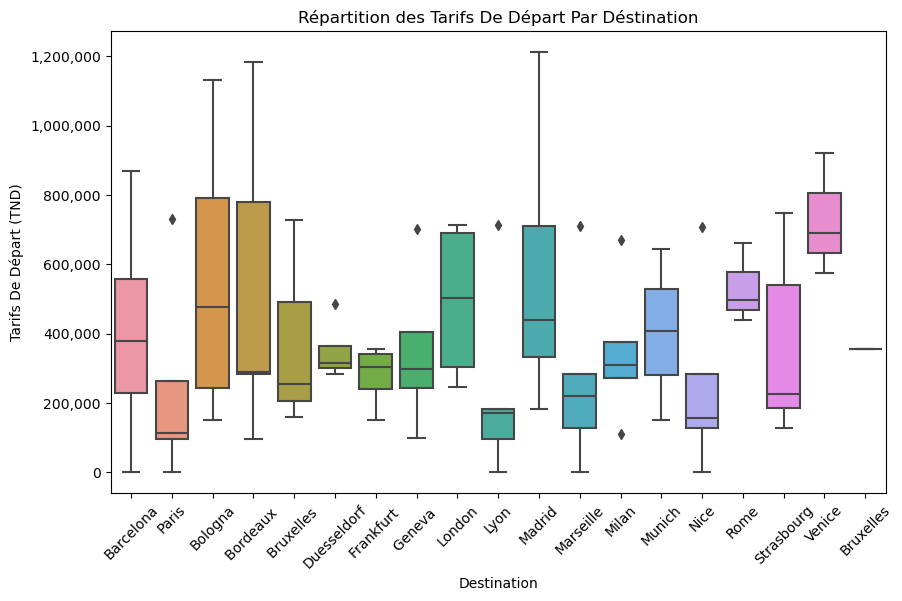

In [9]:
#Boxlot  des tarifs de depart par destination
plt.figure(figsize=(10, 6))
sns.boxplot(x="Destination", y="Departure_Fare", data=cleaned_data)
plt.title("Répartition des Tarifs De Départ Par Déstination")
plt.xlabel("Destination")
plt.ylabel("Tarifs De Départ (TND)")
plt.xticks(rotation=45)
# Formater les valeurs des axes avec des séparateurs de milliers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

#### Intépertation
<p>diagramme à boîte (box plot) qui montre la répartition des tarifs de départ (en TND) pour différentes destinations : Barcelone, Paris, Bologne, Bordeaux, Bruxelles, Düsseldorf, Francfort, Genève, Londres, Lyon, Madrid, Marseille, Milan, Munich, Nice, Rome, Strasbourg, Venise, et Bruxelles.

Analyse
Barcelone :
La médiane est autour de 400 000 TND.
L'intervalle interquartile (IQR) s'étend de 200 000 TND à environ 600 000 TND.
Quelques valeurs aberrantes au-dessus de 800 000 TND.
    
Paris :
La médiane est relativement basse, autour de 200 000 TND.
L'IQR est large, s'étendant de 0 à environ 600 000 TND.
Plusieurs valeurs aberrantes au-dessus de 800 000 TND.
Bologne :
    
La médiane est autour de 600 000 TND.
L'IQR est assez large, de 400 000 TND à environ 800 000 TND.
Quelques valeurs aberrantes au-dessus de 1 000 000 TND.
    
Bordeaux :
La médiane est autour de 600 000 TND.
L'IQR s'étend de 400 000 TND à environ 800 000 TND.
Quelques valeurs aberrantes.
    
Bruxelles :
La médiane est autour de 400 000 TND.
L'IQR s'étend de 200 000 TND à environ 800 000 TND.
Quelques valeurs aberrantes.
    
Düsseldorf :
La médiane est très basse, autour de 100 000 TND.
L'IQR est étroit, de 50 000 TND à environ 200 000 TND.
    
Francfort :
La médiane est autour de 200 000 TND.
L'IQR est de 100 000 TND à environ 300 000 TND.
Quelques valeurs aberrantes.
    
Genève :
La médiane est autour de 300 000 TND.
L'IQR est de 200 000 TND à environ 400 000 TND.
    
Londres :
La médiane est autour de 400 000 TND.
L'IQR est de 200 000 TND à environ 600 000 TND.
Quelques valeurs aberrantes.
    
Lyon :
La médiane est autour de 300 000 TND.
L'IQR est de 200 000 TND à environ 500 000 TND.
Quelques valeurs aberrantes.
    
Madrid :
La médiane est autour de 500 000 TND.
L'IQR est de 300 000 TND à environ 700 000 TND.
Quelques valeurs aberrantes.
    
Marseille :
La médiane est autour de 300 000 TND.
L'IQR est de 200 000 TND à environ 500 000 TND.
Quelques valeurs aberrantes.
    
Milan :
La médiane est autour de 300 000 TND.
L'IQR est de 200 000 TND à environ 400 000 TND.
Quelques valeurs aberrantes.
    
Munich :
La médiane est autour de 300 000 TND.
L'IQR est de 200 000 TND à environ 500 000 TND.
Quelques valeurs aberrantes.
    
Nice :
La médiane est autour de 300 000 TND.
L'IQR est de 200 000 TND à environ 500 000 TND.
Quelques valeurs aberrantes.
    
Rome :
La médiane est autour de 300 000 TND.
L'IQR est de 200 000 TND à environ 500 000 TND.
Quelques valeurs aberrantes.
Strasbourg :
    
La médiane est autour de 300 000 TND.
L'IQR est de 200 000 TND à environ 500 000 TND.
Quelques valeurs aberrantes.
    
Venise :
La médiane est autour de 400 000 TND.
L'IQR est de 200 000 TND à environ 600 000 TND.
Quelques valeurs aberrantes.
    
Bruxelles (secondaire) :
La médiane est autour de 200 000 TND.
L'IQR est de 100 000 TND à environ 300 000 TND.
    
Quelques valeurs aberrantes.
Implications
Paris et Düsseldorf semblent être des destinations avec des tarifs très variables et de nombreuses valeurs aberrantes, ce qui pourrait indiquer des fluctuations importantes en fonction de la demande ou de la saison.
Bologne, Bordeaux, et Bruxelles montrent des tarifs relativement élevés et constants, ce qui pourrait indiquer une demande stable et un marché moins compétitif.
    
Genève, Lyon, et Londres présentent des tarifs modérés avec quelques fluctuations, indiquant une demande équilibrée.
Madrid, Marseille, et Milan ont des tarifs plus modérés, suggérant une popularité stable mais compétitive.
Nice, Rome, et Strasbourg montrent une tarification modérée avec quelques valeurs aberrantes, ce qui pourrait être le résultat de la concurrence et des promotions.
    
Les destinations avec des valeurs aberrantes élevées, telles que Barcelone et Venise, peuvent avoir des périodes de haute demande où les prix augmentent significativement.</p>

### 4.Répartition des Tarifs de retour par Compagnie Aérienne

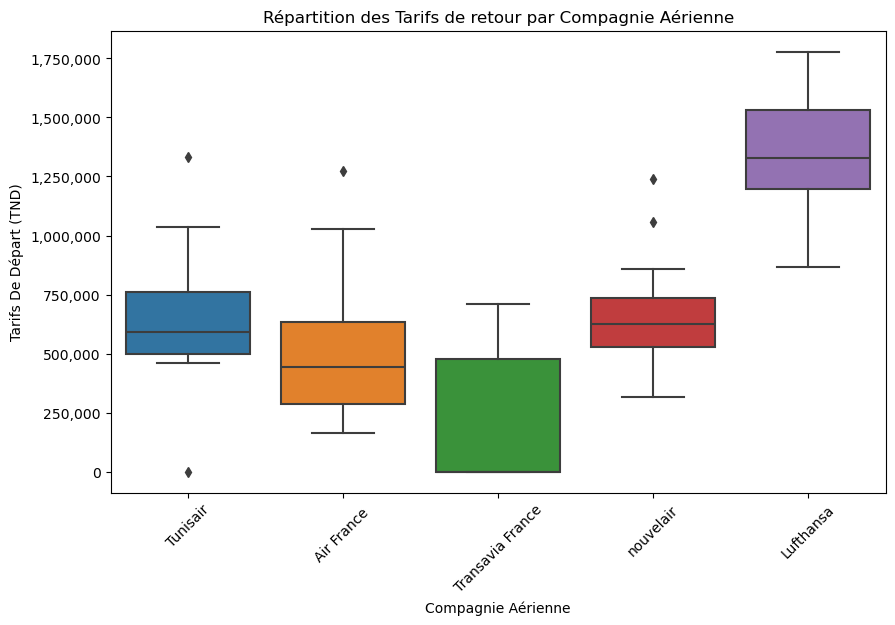

In [10]:
#Boxplot Des tarifs De retour par compagnie aerienne 
plt.figure(figsize=(10, 6 ))
sns.boxplot(x="Airline_company", y="Return_Fare", data=cleaned_data)
plt.title("Répartition des Tarifs de retour par Compagnie Aérienne")
plt.xlabel("Compagnie Aérienne")
plt.ylabel("Tarifs De Départ (TND)")
plt.xticks(rotation=45)
# Formater les valeurs des axes avec des séparateurs de milliers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()


#### interpretation
une boîte à moustaches comparant les tarifs de retour par compagnie aérienne. Voici une interprétation détaillée de ce graphique :

Axe des y (Tarifs De Départ (TND)) : Cet axe représente les tarifs de retour en Dinar Tunisien (TND).

Axe des x (Compagnie Aérienne) : Cet axe répertorie les différentes compagnies aériennes comparées : Tunisair, Air France, Transavia France, Nouvelair, et Lufthansa.

Boîtes à moustaches :

Chaque boîte montre la répartition des tarifs pour chaque compagnie aérienne.
La ligne à l'intérieur de chaque boîte représente la médiane (le 50e percentile) des tarifs.
Les limites de la boîte représentent le premier (25e percentile) et le troisième quartile (75e percentile), montrant la dispersion interquartile (IQR).

Les moustaches (lignes verticales) s'étendent jusqu'aux valeurs non aberrantes les plus basses et les plus élevées, souvent définies comme 1,5 fois l'IQR en dessous du premier quartile et au-dessus du troisième quartile.
Les points en dehors des moustaches sont considérés comme des valeurs aberrantes (outliers).
Comparaison par compagnie aérienne :
Tunisair :

Les tarifs varient de manière assez large avec quelques valeurs aberrantes au-dessus de 1,000,000 TND.
La médiane est environ 600,000 TND.
Air France :

Les tarifs sont plus concentrés, avec une médiane légèrement inférieure à celle de Tunisair.
Les valeurs aberrantes dépassent 1,000,000 TND.
Transavia France :

La boîte est plus petite, indiquant une dispersion plus faible des tarifs.
La médiane est la plus basse parmi les compagnies représentées, autour de 400,000 TND.
Nouvelair :

Les tarifs sont également concentrés mais avec une médiane autour de 500,000 TND.
Quelques valeurs aberrantes proches de 750,000 TND.
Lufthansa :

Affiche la plus grande dispersion avec des tarifs allant de 500,000 TND à plus de 1,500,000 TND.
La médiane est la plus élevée parmi les compagnies, dépassant 1,000,000 TND.
Conclusions :
Lufthansa semble être la compagnie aérienne avec les tarifs les plus élevés et les plus variables.
Transavia France propose les tarifs les plus bas et les plus stables.
Tunisair, Air France, et Nouvelair ont des tarifs intermédiaires, avec Tunisair ayant une dispersion plus large.

### 5.Répartition des Tarifs De Retour Par Leur Tarif  De Retour

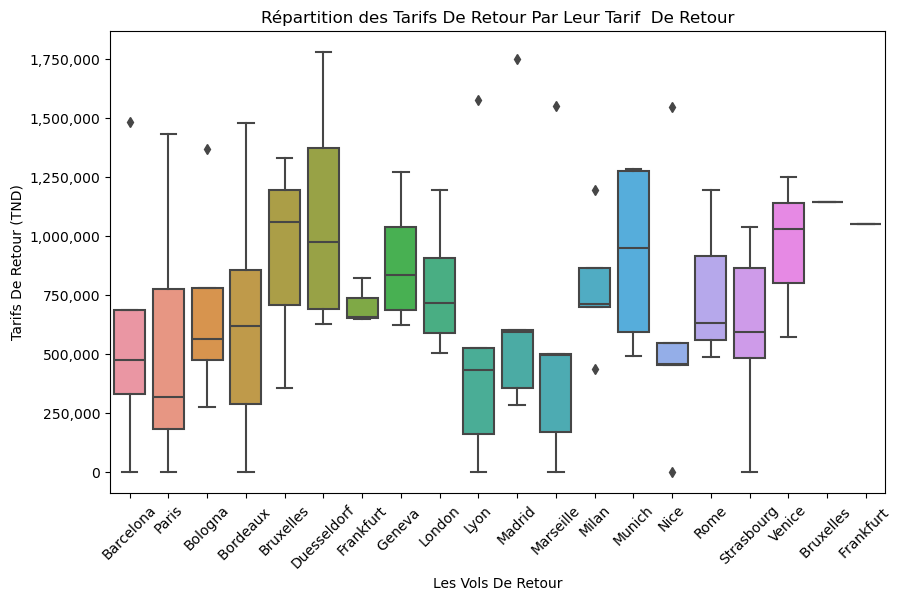

In [11]:
#Boxlot  des tarifs de retour par Return_Depart_Airport
plt.figure(figsize=(10, 6))
sns.boxplot(x="Return_Depart_Airport", y="Return_Fare", data=cleaned_data)
plt.title("Répartition des Tarifs De Retour Par Leur Tarif  De Retour")
plt.xlabel("Les Vols De Retour")
plt.ylabel("Tarifs De Retour (TND)")
plt.xticks(rotation=45)
# Formater les valeurs des axes avec des séparateurs de milliers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

#### Intérpretation
 boîte à moustaches comparant les tarifs de retour par destination. Voici une interprétation détaillée de ce graphique :

Axe des y (Tarifs De Retour (TND)) : Cet axe représente les tarifs de retour en Dinar Tunisien (TND).

Axe des x (Les Vols De Retour) : Cet axe répertorie les différentes destinations des vols de retour : Barcelona, Paris, Bologna, Bordeaux, Bruxelles, Duesseldorf, Frankfurt, Geneva, London, Lyon, Madrid, Marseille, Milan, Munich, Nice, Rome, Strasbourg, Venice.

Boîtes à moustaches :

Chaque boîte montre la répartition des tarifs pour chaque destination.
La ligne à l'intérieur de chaque boîte représente la médiane (le 50e percentile) des tarifs.
Les limites de la boîte représentent le premier (25e percentile) et le troisième quartile (75e percentile), montrant la dispersion interquartile (IQR).
Les moustaches (lignes verticales) s'étendent jusqu'aux valeurs non aberrantes les plus basses et les plus élevées, souvent définies comme 1,5 fois l'IQR en dessous du premier quartile et au-dessus du troisième quartile.
Les points en dehors des moustaches sont considérés comme des valeurs aberrantes (outliers).
Comparaison par destination :
Barcelona :

Les tarifs varient de manière assez large, avec une médiane autour de 500,000 TND.
Paris :

La boîte montre une large dispersion avec des tarifs allant jusqu'à environ 1,250,000 TND, et une médiane autour de 750,000 TND.
Bologna :

Les tarifs sont concentrés, avec une médiane légèrement inférieure à celle de Paris.
Bordeaux :

Les tarifs varient avec une médiane autour de 750,000 TND.
Bruxelles :

Affiche une grande dispersion avec des tarifs allant jusqu'à environ 1,500,000 TND, et une médiane assez élevée.
Duesseldorf :

La boîte est plus petite, indiquant une dispersion plus faible des tarifs et une médiane basse autour de 500,000 TND.
Frankfurt :

Affiche une grande dispersion avec des tarifs allant jusqu'à environ 1,250,000 TND, et une médiane élevée.
Geneva :

Les tarifs sont concentrés avec une médiane autour de 500,000 TND.
London :

La boîte montre une dispersion moyenne des tarifs avec une médiane proche de 750,000 TND.
Lyon :

Les tarifs varient, avec une médiane autour de 500,000 TND.
Madrid :

Les tarifs sont concentrés avec une médiane basse autour de 500,000 TND.
Marseille :

Les tarifs montrent une petite dispersion avec une médiane autour de 500,000 TND.
Milan :

Les tarifs varient, avec une médiane proche de 1,000,000 TND.
Munich :

Affiche une grande dispersion avec des tarifs allant jusqu'à environ 1,750,000 TND, et une médiane élevée.
Nice :

Les tarifs sont concentrés avec une médiane basse autour de 500,000 TND.
Rome :

Les tarifs varient, avec une médiane proche de 750,000 TND.
Strasbourg :

Affiche une grande dispersion avec des tarifs allant jusqu'à environ 1,250,000 TND, et une médiane assez élevée.
Venice :

Les tarifs montrent une petite dispersion avec une médiane autour de 750,000 TND.

Conclusions :
Munich et Bruxelles semblent avoir les tarifs les plus élevés et les plus variables.
Duesseldorf, Geneva, et Madrid offrent des tarifs plus bas et plus stables.
Les autres destinations présentent des tarifs intermédiaires avec des dispersions variables.

### 6.Comparaison des tarifs moyens entre Tunisair et les compagnies françaises

In [12]:
french_companies=["Air France ", "Transavia France","nouvelair","Lufthansa"]

In [13]:
tunisair_data = cleaned_data[cleaned_data['Airline_company'] == 'Tunisair']


In [14]:
french_data = cleaned_data[cleaned_data['Airline_company'].isin(french_companies)]


In [15]:
# Calculer les tarifs moyens pour tunisair et chaque compagnie francaise 
mean_fares = {}
mean_fares["Tunisair"] = [tunisair_data['Departure_Fare'].mean(), tunisair_data["Return_Fare"].mean()]
for Airline_company in  french_companies:
    company_data = french_data[french_data["Airline_company"] == Airline_company]
    mean_fares[Airline_company] = [company_data["Departure_Fare"].mean(), company_data["Return_Fare"].mean()]
# Convertir les données en DataFrame pour faciliter la visualisation
mean_fares_df = pd.DataFrame(mean_fares, index=['Tarif de Départ', 'Tarif de Retour'])   
mean_fares_df

,Tunisair,Air France,Transavia France,nouvelair,Lufthansa
Tarif de Départ,"333,691.42","355,777.78","345,588.63","154,937.50","728,861.11"
Tarif de Retour,"648,951.56","504,222.22","198,941.46","663,125.00","1,356,888.89"


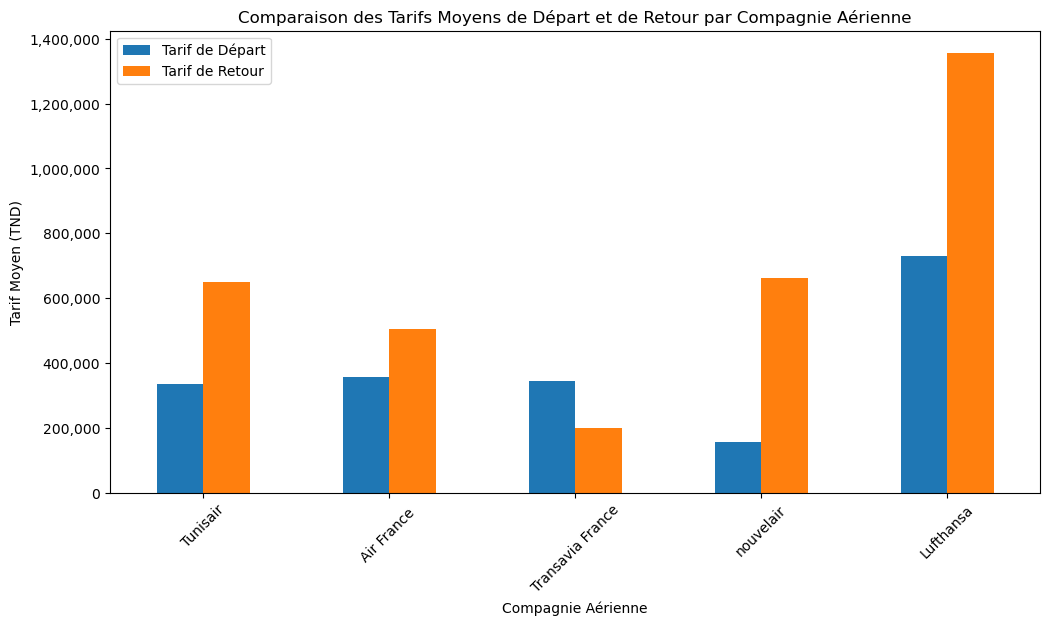

In [16]:
#Graphique Des tarifs moyens 
mean_fares_df.T.plot(kind='bar', figsize=(12,6))
plt.title("Comparaison des Tarifs Moyens de Départ et de Retour par Compagnie Aérienne")
plt.xlabel("Compagnie Aérienne")
plt.ylabel("Tarif Moyen (TND)")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()

#### interpretation
 montre un graphique à barres comparant les tarifs moyens de départ et de retour par compagnie aérienne. Voici une interprétation détaillée de ce graphique :

Axe des y (Tarif Moyen (TND)) : Cet axe représente les tarifs moyens en Dinar Tunisien (TND).

Axe des x (Compagnie Aérienne) : Cet axe répertorie les différentes compagnies aériennes comparées : Tunisair, Air France, Transavia France, Nouvelair, et Lufthansa.

Barres bleues et oranges :

Les barres bleues représentent les tarifs moyens de départ.
Les barres oranges représentent les tarifs moyens de retour.
Comparaison par compagnie aérienne :
Tunisair :

Le tarif moyen de départ est inférieur à 400,000 TND.
Le tarif moyen de retour est supérieur à 600,000 TND.
Les tarifs de retour sont nettement plus élevés que les tarifs de départ.
Air France :

Le tarif moyen de départ est autour de 400,000 TND.
Le tarif moyen de retour est légèrement inférieur à 600,000 TND.
Les tarifs de retour sont également plus élevés que les tarifs de départ.
Transavia France :

Le tarif moyen de départ est inférieur à 300,000 TND.
Le tarif moyen de retour est autour de 400,000 TND.
Les tarifs de retour sont plus élevés que les tarifs de départ, mais la différence est moins prononcée que pour Tunisair et Air France.
Nouvelair :

Le tarif moyen de départ est inférieur à 300,000 TND.
Le tarif moyen de retour est légèrement inférieur à 500,000 TND.
Les tarifs de retour sont également plus élevés que les tarifs de départ.
Lufthansa :

Le tarif moyen de départ est supérieur à 600,000 TND.
Le tarif moyen de retour est autour de 1,200,000 TND.
Les tarifs de retour sont nettement plus élevés que les tarifs de départ, et la différence est la plus prononcée parmi toutes les compagnies aériennes comparées.
Conclusions :
Lufthansa affiche les tarifs moyens les plus élevés, tant pour les départs que pour les retours.
Transavia France offre les tarifs moyens les plus bas, tant pour les départs que pour les retours.
Pour toutes les compagnies aériennes, les tarifs moyens de retour sont systématiquement plus élevés que les tarifs moyens de départ.
La différence entre les tarifs moyens de départ et de retour varie en fonction des compagnies aériennes, avec Lufthansa montrant la plus grande différence.
Ce graphique permet de comparer les tarifs moyens des départs et des retours pour différentes compagnies aériennes, mettant en évidence les différences de tarification entre elles.

### 7. les différences de tarifs entre Tunisair et les autres compagnies aériennes pour chaque destination

In [17]:
# Faire une copie De la DataFrame
cleaned_data = cleaned_data.copy()

#Nettoyer les colononnes Des Tarifs
cleaned_data["Departure_Fare"] = cleaned_data["Departure_Fare"].astype(str).str.replace('TND', '').str.replace(',','').str.strip()
cleaned_data["Return_Fare"] = cleaned_data["Return_Fare"].astype(str).str.replace('TND', '').str.replace(',','').str.strip()
# Convertir les tarifs en valeur numérique
cleaned_data["Departure_Fare"] = pd.to_numeric(cleaned_data["Departure_Fare"], errors="coerce")
cleaned_data["Return_Fare"] = pd.to_numeric(cleaned_data["Return_Fare"], errors="coerce")

#Convertir les date sous le format de DateTime
cleaned_data["Departure_Date"] = pd.to_datetime(cleaned_data["Departure_Date"], errors="coerce")
cleaned_data["Return_Date"] = pd.to_datetime(cleaned_data["Return_Date"], errors="coerce")

#Calculer Les tarifs moyen par leur destinantion et leur compagnie aerienne
avg_fares_by_destination = cleaned_data.groupby(["Destination","Airline_company"])[["Departure_Fare","Return_Fare"]].mean().reset_index()
#Séparer les données du tunisair et des autres compagnie 
tunisair_fares = avg_fares_by_destination[avg_fares_by_destination["Airline_company"]== "Tunisair"]
other_companies_fares = avg_fares_by_destination[avg_fares_by_destination["Airline_company"]!= "Tunisair"]
# Fusionner les données sur la colonne 'Destination'
merged_fares= pd.merge(tunisair_fares , other_companies_fares, on="Destination", suffixes=('_Tunisair','_other'))

#Calculer les différentes tarifs entre tunisar et les autres compagnie aerienne 
merged_fares["Departure_Fare_Diff"] = merged_fares["Departure_Fare_Tunisair"] - merged_fares["Departure_Fare_other"]
merged_fares["Return_Fare_Diff"] = merged_fares["Return_Fare_Tunisair"] - merged_fares["Return_Fare_other"]
#Identifier les destinations avec les plus grandes différences des tarifs
top_departure_diff = merged_fares.nlargest(10, "Departure_Fare_Diff")
top_return_diff = merged_fares.nlargest(10, "Return_Fare_Diff")


#Afficher les resultats
print("Top 10 destinations avec les plus grandes différences de tarifs de départ :")
print(top_departure_diff[['Destination','Departure_Fare_Diff']])
print( )
print("Top 10 destinations avec les plus grandes différences de tarifs de retour :")
print(top_departure_diff[['Destination','Return_Fare_Diff']])

Top 10 destinations avec les plus grandes différences de tarifs de départ :
   Destination  Departure_Fare_Diff
6      Bologna           529,500.00
24      London           435,000.00
4      Bologna           406,500.00
22      London           358,000.00
43      Munich           339,500.00
40       Milan           266,500.00
32      Madrid           256,500.00
35   Marseille           220,879.16
21     Geneva            210,000.00
10   Bordeaux            186,000.00

Top 10 destinations avec les plus grandes différences de tarifs de retour :
   Destination  Return_Fare_Diff
6      Bologna         46,000.00
24      London       -114,500.00
4      Bologna        310,000.00
22      London       -308,500.00
43      Munich       -135,500.00
40       Milan        165,500.00
32      Madrid        238,000.00
35   Marseille        497,929.35
21     Geneva         249,000.00
10   Bordeaux        -237,500.00


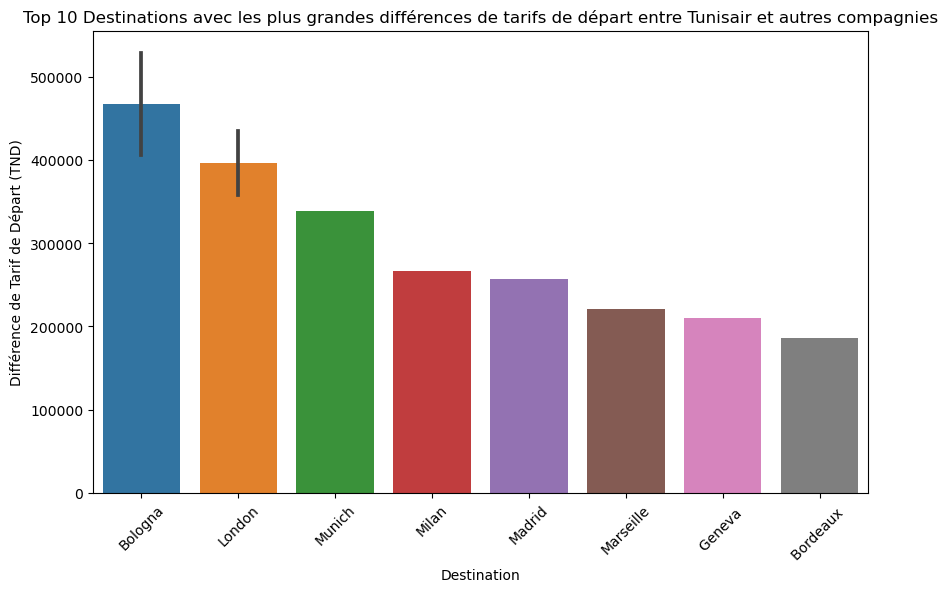

In [18]:
#Tracage Des diagrammes barplot
plt.figure(figsize=(10, 6 ))
sns.barplot(data=top_departure_diff, x='Destination', y='Departure_Fare_Diff')
plt.title("Top 10 Destinations avec les plus grandes différences de tarifs de départ entre Tunisair et autres compagnies")
plt.xlabel('Destination')
plt.ylabel('Différence de Tarif de Départ (TND)')
plt.xticks(rotation=45)
plt.show()


#### Interpretation

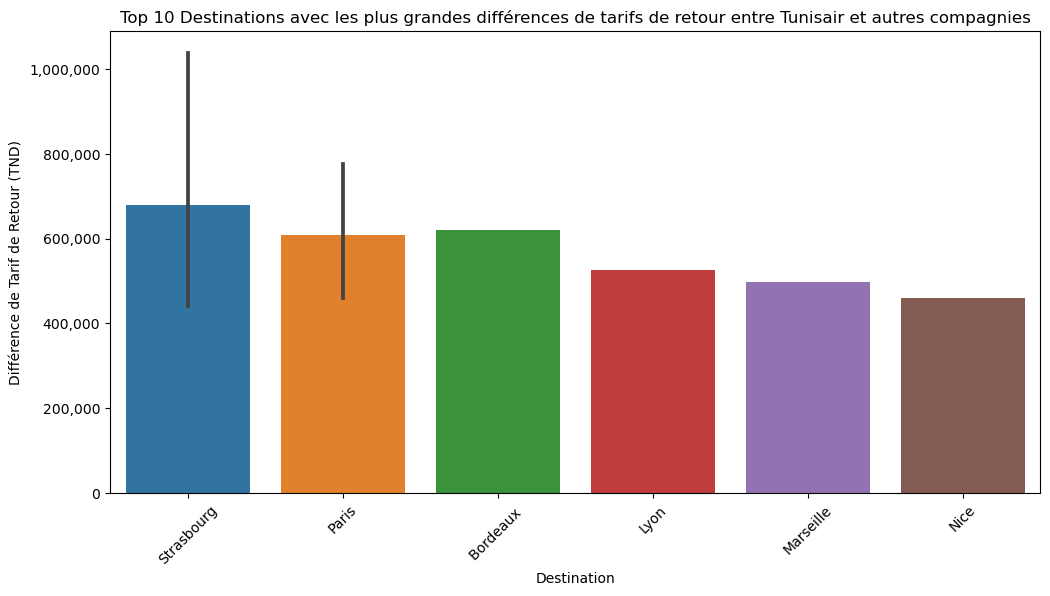

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_return_diff, x='Destination', y='Return_Fare_Diff')
plt.title('Top 10 Destinations avec les plus grandes différences de tarifs de retour entre Tunisair et autres compagnies')
plt.xlabel('Destination')
plt.ylabel('Différence de Tarif de Retour (TND)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(rotation=45)
plt.show()


#### Interpretation

In [26]:
# Convert the 'Departure_Date' and 'Return_Date' to datetime format
cleaned_data['Departure_Date'] = pd.to_datetime(cleaned_data['Departure_Date'], errors='coerce', dayfirst=True)
cleaned_data['Return_Date'] = pd.to_datetime(cleaned_data['Return_Date'], errors='coerce', dayfirst=True)

# Convert the 'Departure_Fare' and 'Return_Fare' to numeric by removing non-numeric characters and converting to float
cleaned_data['Departure_Fare'] = cleaned_data['Departure_Fare'].replace({',': '.', ' TND': ''}, regex=True).astype(float)
cleaned_data['Return_Fare'] = cleaned_data['Return_Fare'].replace({',': '.', ' TND': ''}, regex=True).astype(float)

# Display the cleaned data
cleaned_data.head()


,Airline_company,Depart_Airport,Destination,Departure_Date,Departure_Fare,Return_Depart_Airport,Return_Destination,Return_Date,Return_Fare,Passenger_Count
0,Tunisair,Tunis Carthage(TUN),Barcelona,NaT,445.50,Barcelona,Tunis Carthage(TUN),2024-07-07,628.00,1 Adult
1,Tunisair,Tunis Carthage(TUN),Paris,NaT,"114,000.00",Paris,Tunis Carthage(TUN),2024-07-07,"776,000.00",1 Adult
2,Tunisair,Tunis Carthage(TUN),Bologna,2024-07-01,"679,500.00",Bologna,Tunis Carthage(TUN),2024-07-07,"586,000.00",1 Adult
3,Tunisair,Tunis Carthage(TUN),Bordeaux,2024-07-02,"283,000.00",Bordeaux,Tunis Carthage(TUN),2024-07-09,"620,500.00",1 Adult
4,Tunisair,Tunis Carthage(TUN),Bruxelles,2024-07-01,"254,500.00",Bruxelles,Tunis Carthage(TUN),2024-07-08,"1,332,000.00",1 Adult


In [28]:
# Convertir les dates en format datetime
cleaned_data['Departure_Date'] = pd.to_datetime(cleaned_data['Departure_Date'], errors='coerce', dayfirst=True)
cleaned_data['Return_Date'] = pd.to_datetime(cleaned_data['Return_Date'], errors='coerce', dayfirst=True)

# Convertir les tarifs en valeurs numériques
cleaned_data['Departure_Fare'] = cleaned_data['Departure_Fare'].replace({',': '.', ' TND': ''}, regex=True).astype(float)
cleaned_data['Return_Fare'] = cleaned_data['Return_Fare'].replace({',': '.', ' TND': ''}, regex=True).astype(float)


### 8.Identification des tendances des tarifs aériens dans le temps Analyse des périodes avec des tarifs plus élevés ou plus bas Cluster analysis

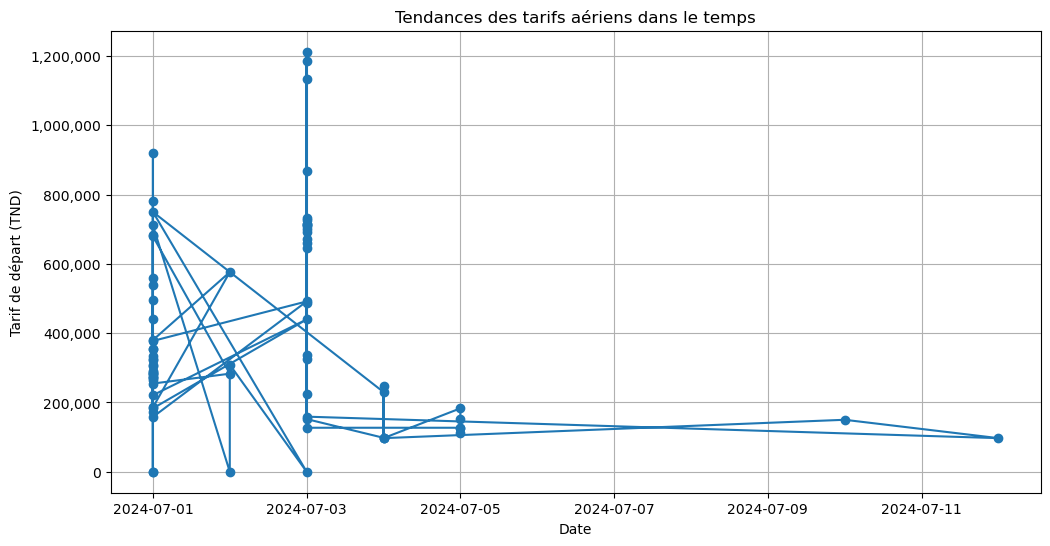

In [31]:
import matplotlib.pyplot as plt

# Tracer les tendances des tarifs aériens
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Departure_Date'], cleaned_data['Departure_Fare'], marker='o', linestyle='-')
plt.title('Tendances des tarifs aériens dans le temps')
plt.xlabel('Date')
plt.ylabel('Tarif de départ (TND)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()


#### Interpretation 

C:\Users\chour\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chour\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


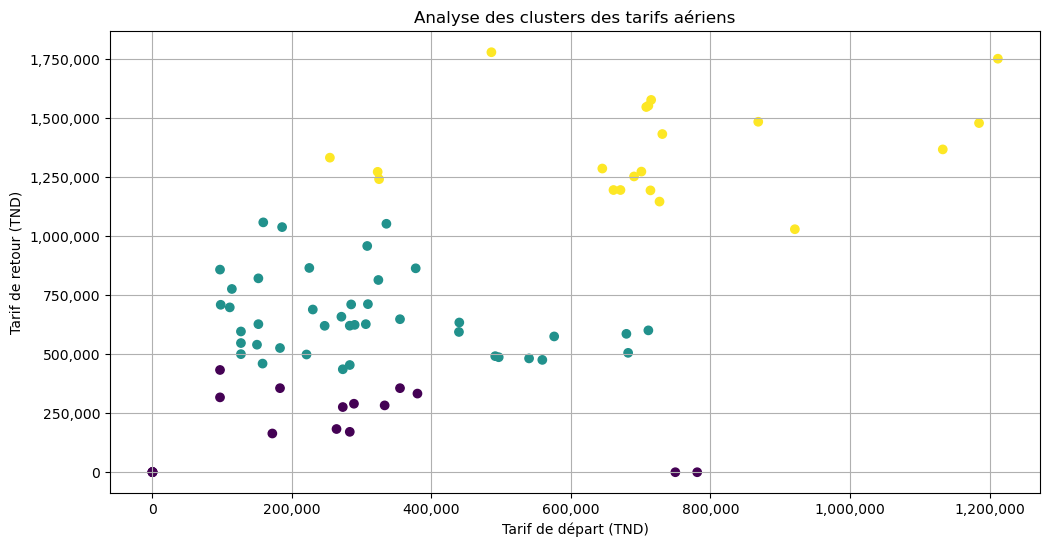

In [36]:
from sklearn.cluster import KMeans

# Exemple de clustering avec K-means
features = cleaned_data[['Departure_Fare', 'Return_Fare']]
kmeans = KMeans(n_clusters=3)
cleaned_data['cluster'] = kmeans.fit_predict(features)

# Visualisation des clusters
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_data['Departure_Fare'], cleaned_data['Return_Fare'], c=cleaned_data['cluster'], cmap='viridis')
plt.title('Analyse des clusters des tarifs aériens')
plt.xlabel('Tarif de départ (TND)')
plt.ylabel('Tarif de retour (TND)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.show()


#### interpretation